In [2]:
import os
import re

import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import anndata

In [3]:
import scrublet as scr

In [4]:
# raw counts are raw.X
counts_adata = sc.read_h5ad('../data/single_cell/original/integrated_rna.h5ad')
counts_adata

AnnData object with n_obs × n_vars = 113052 × 31915
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.0.75', 'seurat_clusters', 'sample_id', 'cell_type'
    var: '_index', 'features'
    obsm: 'X_umap'

In [22]:
counts_adata.obs['sample_id'] = [x.split('_')[0] if s == 'NA' else s
                             for x, s in zip(counts_adata.obs.index.to_list(), counts_adata.obs['sample_id'])]

In [23]:
counts_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,CELL,CONDITION,Patient,Type,Cell_type,integrated_snn_res.0.75,seurat_clusters,sample_id,cell_type
1555-tumor_AAACCTGAGACCTAGG-1,1555-tumor,2931,1169,5.83418628454452,1767,1057,NA,NA,NA,NA,NA,18,18,1555-tumor,NK/T
1555-tumor_AAACCTGAGTGCGTGA-1,1555-tumor,21400,4292,6.10747663551402,1480,691,NA,NA,NA,NA,NA,7,7,1555-tumor,Malignant
1555-tumor_AAACCTGCATCCCACT-1,1555-tumor,515,340,4.66019417475728,1090,366,NA,NA,NA,NA,NA,14,14,1555-tumor,NK/T
1555-tumor_AAACCTGGTCATGCAT-1,1555-tumor,1586,689,19.1046658259773,1431,689,NA,NA,NA,NA,NA,21,21,1555-tumor,B cell
1555-tumor_AAACCTGTCCGGGTGT-1,1555-tumor,2631,1049,5.92930444697834,1710,990,NA,NA,NA,NA,NA,18,18,1555-tumor,NK/T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G9903_filtered_gene_bc_matrices_h5.h5_TTTGGTTTCTACCAGA-1,G9903,8237,2326,1.11691149690421,9501,2326,NA,NA,NA,NA,NA,5,5,G9903,Fibroblast
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCAAGTTGTCGT-1,G9903,6484,1875,1.09500308451573,9275,1888,NA,NA,NA,NA,NA,5,5,G9903,Fibroblast
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACAACTTGAC-1,G9903,8367,2286,2.85645990199594,9493,2286,NA,NA,NA,NA,NA,5,5,G9903,Fibroblast
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACATATGGTC-1,G9903,11476,3055,1.81247821540606,10490,3055,NA,NA,NA,NA,NA,27,27,G9903,UNK_NOISE


In [24]:
set(counts_adata.obs['sample_id'])

{'100070',
 '1555-tumor',
 '85948',
 '87235',
 '87784',
 '90209_CMP',
 '91412',
 '91610',
 '91706',
 '94930',
 '95092',
 '95373',
 '96460',
 '97727',
 'COMP_0158_P',
 'G9903',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'P01',
 'P02',
 'P03',
 'P04',
 'P05',
 'P06',
 'P07',
 'P08',
 'P09',
 'P10',
 'T1',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T2',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1'}

In [30]:
cell_to_doublet_score = {}
for s in sorted(set(counts_adata.obs['sample_id'])):
    print(s)
    a = counts_adata[counts_adata.obs['sample_id']==s]
    scrub = scr.Scrublet(a.raw.X.toarray())
    doublet_scores, predicted_doublets = scrub.scrub_doublets()
    for cid, score, pred in zip(a.obs.index.to_list(), doublet_scores, predicted_doublets):
        cell_to_doublet_score[cid] = (score, pred)

100070
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 12.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.3%
Elapsed time: 2.4 seconds
1555-tumor
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.3%
Elapsed time: 2.0 seconds
85948
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 13.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.7%
Elapsed time: 2.2 seconds
87235
Prepr

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.3%
Elapsed time: 0.7 seconds
P08
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 17.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.6%
Elapsed time: 0.8 seconds
P09
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 16.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.1%
Elapsed time: 0.6 seconds
P10
Preprocessing...
Simul

Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 22.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.8%
Elapsed time: 0.5 seconds
T8
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 13.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.1%
Elapsed time: 0.5 seconds
T9
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 34.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.1%
Elapsed time: 2.1 seconds
TWCE-HT055P-S1PAG
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatica

In [35]:
counts_adata.obs['doublet_score'] = [cell_to_doublet_score[c][0]
                                     for c in counts_adata.obs.index.to_list()]
counts_adata.obs['is_doublet'] = ['yes' if cell_to_doublet_score[c][1] else 'no'
                                     for c in counts_adata.obs.index.to_list()]

In [36]:
set(counts_adata.obs['is_doublet'])

{'no', 'yes'}

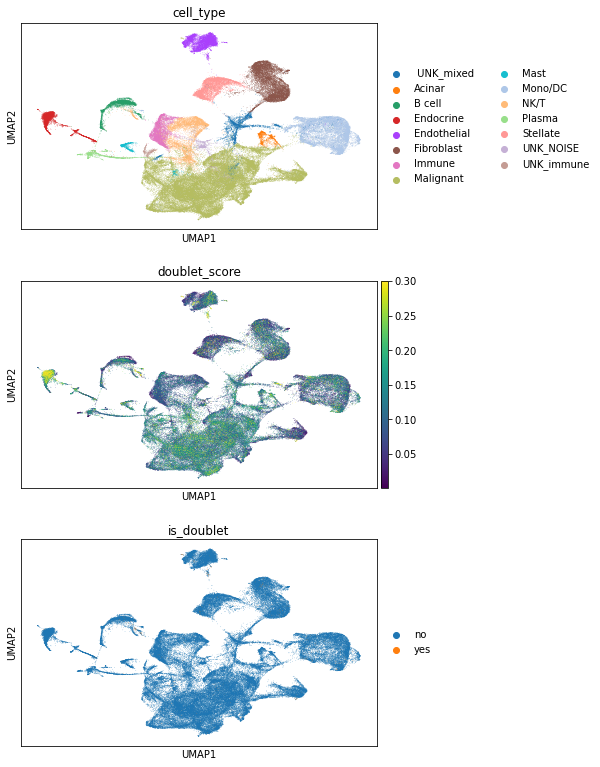

In [37]:
sc.pl.umap(counts_adata, color=['cell_type', 'doublet_score', 'is_doublet'], ncols=1, vmax=.3)

In [38]:
df = counts_adata.obs[['doublet_score', 'is_doublet']]
df

,doublet_score,is_doublet
1555-tumor_AAACCTGAGACCTAGG-1,0.113636,no
1555-tumor_AAACCTGAGTGCGTGA-1,0.098446,no
1555-tumor_AAACCTGCATCCCACT-1,0.093960,no
1555-tumor_AAACCTGGTCATGCAT-1,0.065574,no
1555-tumor_AAACCTGTCCGGGTGT-1,0.119374,no
...,...,...
G9903_filtered_gene_bc_matrices_h5.h5_TTTGGTTTCTACCAGA-1,0.020408,no
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCAAGTTGTCGT-1,0.036088,no
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACAACTTGAC-1,0.065649,no
G9903_filtered_gene_bc_matrices_h5.h5_TTTGTCACATATGGTC-1,0.098266,no


In [39]:
df.to_csv('../data/single_cell/original/doublets.txt', sep='\t')

In [40]:
# raw counts are raw.X
counts_adata = sc.read_h5ad('../data/single_cell/original/inhouse/eus_fnb_rna.h5ad')
counts_adata

AnnData object with n_obs × n_vars = 25367 × 22833
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT'
    var: '_index', 'features'
    obsm: 'X_umap'

In [42]:
counts_adata.obs['sample_id'] = counts_adata.obs['orig.ident']

In [43]:
cell_to_doublet_score = {}
for s in sorted(set(counts_adata.obs['sample_id'])):
    print(s)
    a = counts_adata[counts_adata.obs['sample_id']==s]
    scrub = scr.Scrublet(a.raw.X.toarray())
    doublet_scores, predicted_doublets = scrub.scrub_doublets()
    for cid, score, pred in zip(a.obs.index.to_list(), doublet_scores, predicted_doublets):
        cell_to_doublet_score[cid] = (score, pred)

wu01
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.1%
Elapsed time: 0.7 seconds
wu02
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.2%
Elapsed time: 1.2 seconds
wu03
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.57
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 13.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.0%
Elapsed time: 1.1 seconds
wu04
Preprocessing..

In [44]:
counts_adata.obs['doublet_score'] = [cell_to_doublet_score[c][0]
                                     for c in counts_adata.obs.index.to_list()]
counts_adata.obs['is_doublet'] = ['yes' if cell_to_doublet_score[c][1] else 'no'
                                     for c in counts_adata.obs.index.to_list()]

In [45]:
df = counts_adata.obs[['doublet_score', 'is_doublet']]
df

,doublet_score,is_doublet
wu01_AAACCTGCACATAACC-1,0.105590,no
wu01_AAACCTGCACCACGTG-1,0.061224,no
wu01_AAACCTGTCTAACTTC-1,0.164557,no
wu01_AAACGGGCAAGGCTCC-1,0.097345,no
wu01_AAACGGGTCATTCACT-1,0.061224,no
...,...,...
wu32_TTGTAGGTCGTTACGA-1,0.056180,no
wu32_TTTACTGCAGGCGATA-1,0.109890,no
wu32_TTTATGCCACCTATCC-1,0.095477,no
wu32_TTTCCTCTCGTTGCCT-1,0.049296,no


In [46]:
df.to_csv('../data/single_cell/original/inhouse/doublets.txt', sep='\t')